In [1]:
import numpy as np
from scipy.signal import convolve
from matplotlib import pyplot as plt

a = np.random.normal(0, 1, 16)
b = np.random.normal(0, 1, 16)





-0.5301596529640366
8
[ 3.92169607  0.96788416 -1.58844793 -0.14711466 -6.52980762  0.24234312
 -2.07604329  4.81006064 -0.53015965 -0.56735852 -1.23021562  0.74954323
  0.45623504  2.27704877 -3.24837014 -2.06426971]


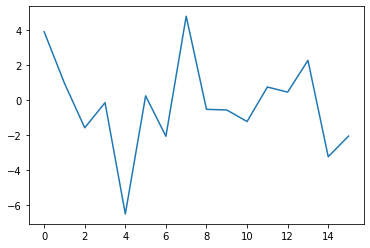

[ 3.92169607  0.96788416 -1.58844793 -0.14711466 -6.52980762  0.24234312
 -2.07604329  4.81006064 -0.53015965 -0.56735852 -1.23021562  0.74954323
  0.45623504  2.27704877 -3.24837014 -2.06426971]


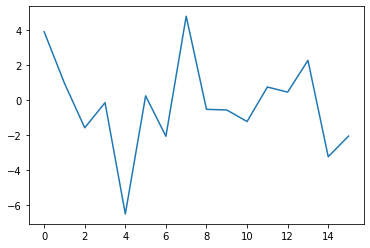

In [2]:
x = np.dot(a, b)
print(x)
print('=========================')

y = convolve(a, b[::-1], mode='same')
print(list(y).index(x))
print(y)
plt.plot(y)
plt.show()


def fft_convolve(signal, kernel):
    diff = len(signal) - len(kernel)
    
    kernel_width = len(kernel)
    half_width = kernel_width // 2
    sig_padded = np.pad(signal, [(half_width, half_width)])
    kernel_padded = np.pad(kernel, [(0, len(sig_padded) - kernel_width)])
    
    # convolve in the frequency domain with the padded, flipped kernel 
    
    z2 = np.fft.irfft(np.fft.rfft(sig_padded) * np.fft.rfft(kernel_padded[::-1]))

    # grab the kernel -1 + kernel 
#     z2 = np.fft.fftshift(z2)[kernel_width - 1:-1]
    z2 = np.roll(z2, len(signal) - diff)[kernel_width - 1:-1]
    
    return z2
    


# pad the signal by half on both sides
# pa = np.pad(a, [(8, 8)])

# # pad the kernel by whole on one side 
# pb = np.pad(b, [0, 16])

# # convolve in the frequency domain with the padded, flipped kernel 
# z2 = np.fft.irfft(np.fft.rfft(pa) * np.fft.rfft(pb[::-1]))

# # grab the kernel -1 + kernel 
# z2 = np.fft.fftshift(z2)[15:-1]

z2 = fft_convolve(a, b)

print(z2)
plt.plot(z2)
plt.show()


# z = np.fft.irfft(np.fft.rfft(a) * np.fft.rfft(b[::-1]))
# print(z)
# plt.plot(z)
# plt.show()



(128,)


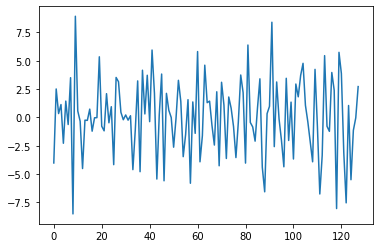

(128,)


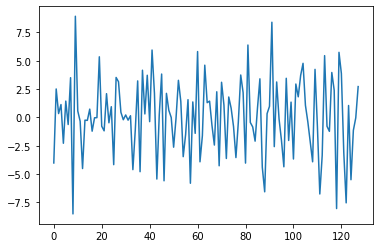

In [3]:
signal = np.random.normal(0, 1, 128)

conv_feature_map = convolve(signal, b[::-1], mode='same')
print(conv_feature_map.shape)

plt.plot(conv_feature_map)
plt.show()

fft_conv_feature_map = fft_convolve(signal, b)
print(fft_conv_feature_map.shape)

plt.plot(fft_conv_feature_map)
plt.show()

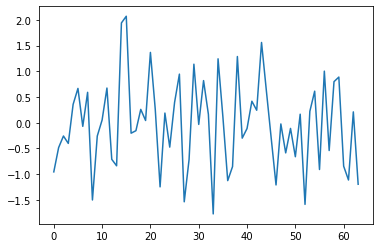

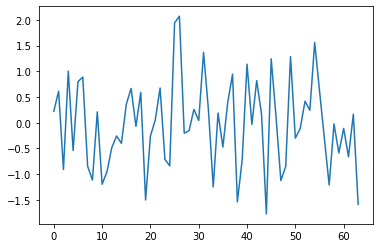

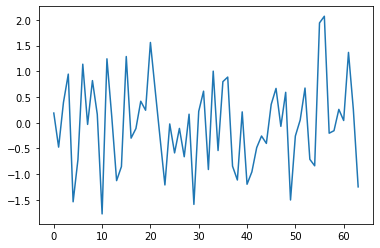

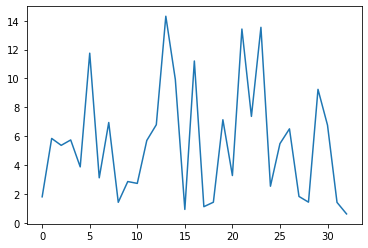

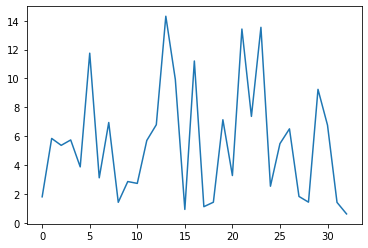

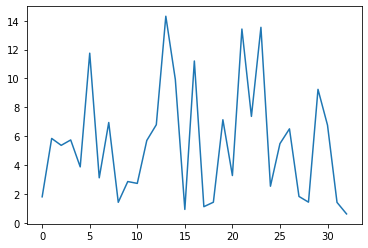

In [9]:
a = np.random.normal(0, 1, 64)
shifted = np.roll(a, 11)
shifted2 = np.roll(a, 41)

plt.plot(a)
plt.show()

plt.plot(shifted)
plt.show()

plt.plot(shifted2)
plt.show()

coeff = np.fft.rfft(a)
coeff2 = np.fft.rfft(shifted)
coeff3 = np.fft.rfft(shifted2)

plt.plot(np.abs(coeff))
plt.show()

plt.plot(np.abs(coeff2))
plt.show()

plt.plot(np.abs(coeff3))
plt.show()
